# Generate a Classification-Network for the MNIST-Dataset. This model will run in parallel with our GAN and predict the classes of our GAN-samples... that will be fun :-)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_data/",one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
num_neurons = 100
num_classes = 10
save_path = './models/'

In [4]:
images = tf.placeholder(tf.float32,[None,28*28])

In [5]:
model = tf.contrib.keras.models.Sequential()

In [6]:
DL = tf.contrib.keras.layers.Dense

In [7]:
model.add(DL(num_neurons,input_dim=(28*28),activation=tf.nn.relu))
model.add(DL(num_neurons,activation=tf.nn.relu))
model.add(DL(num_neurons,activation=tf.nn.relu))
model.add(DL(num_classes,activation=tf.nn.softmax))

In [8]:
model.compile('Adam','categorical_crossentropy',['accuracy'])

In [10]:
model.fit(mnist.train.images,mnist.train.labels,epochs=10,batch_size=100)

Epoch 1/10
55000/55000 [==============================] - 2s - loss: 0.0425 - acc: 0.9860     
Epoch 2/10
55000/55000 [==============================] - 2s - loss: 0.0374 - acc: 0.9873     
Epoch 3/10
55000/55000 [==============================] - 2s - loss: 0.0301 - acc: 0.9905     
Epoch 4/10
55000/55000 [==============================] - 2s - loss: 0.0258 - acc: 0.9915     
Epoch 5/10
55000/55000 [==============================] - 2s - loss: 0.0215 - acc: 0.9931     
Epoch 6/10
55000/55000 [==============================] - 2s - loss: 0.0182 - acc: 0.9941     
Epoch 7/10
55000/55000 [==============================] - 2s - loss: 0.0221 - acc: 0.9925     
Epoch 8/10
55000/55000 [==============================] - 2s - loss: 0.0179 - acc: 0.9943     
Epoch 9/10
55000/55000 [==============================] - 2s - loss: 0.0128 - acc: 0.9959     
Epoch 10/10
55000/55000 [==============================] - 2s - loss: 0.0142 - acc: 0.9953     


In [11]:
with open(save_path+'keras_class_predictor.json','w') as f:
    f.write(model.to_json())
model.save_weights(save_path+'keras_weights.h5')

In [12]:
pred = model.predict(mnist.test.images[0].reshape(1,784))

In [13]:
pred.argmax()

7

In [14]:
mnist.test.labels[0].argmax()

7

In [15]:
pred

array([[  2.13430447e-08,   2.84582491e-08,   2.07615214e-09,
          1.91443412e-08,   1.06568523e-08,   1.06798446e-12,
          1.27320316e-11,   9.99998689e-01,   9.20452603e-10,
          1.21978735e-06]], dtype=float32)

In [16]:
pred

array([[  2.13430447e-08,   2.84582491e-08,   2.07615214e-09,
          1.91443412e-08,   1.06568523e-08,   1.06798446e-12,
          1.27320316e-11,   9.99998689e-01,   9.20452603e-10,
          1.21978735e-06]], dtype=float32)

In [17]:
[str(int(p*10000)/100)+"%" for p in list(pred[0])]

['0.0%',
 '0.0%',
 '0.0%',
 '0.0%',
 '0.0%',
 '0.0%',
 '0.0%',
 '99.99%',
 '0.0%',
 '0.0%']

Echte Zahl 2
Berechnete Zahl 2


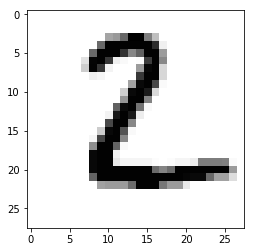

Echte Zahl 1
Berechnete Zahl 1


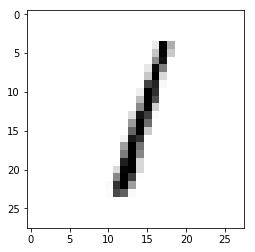

Echte Zahl 0
Berechnete Zahl 0


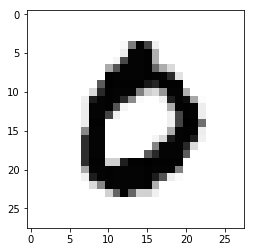

Echte Zahl 4
Berechnete Zahl 4


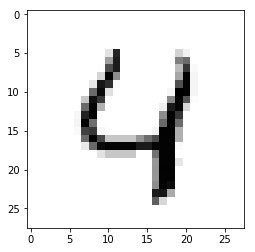

Echte Zahl 1
Berechnete Zahl 1


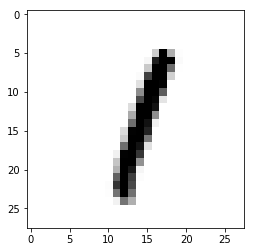

In [30]:
num_pictures = 5
sp = np.random.randint(1,5000,1)[0]
for di in range(num_pictures):
    idx = sp+di
    print('Echte Zahl {}'.format(mnist.test.labels[idx].argmax()))
    print('Berechnete Zahl {}'.format(model.predict(mnist.test.images[idx].reshape(1,28*28)).argmax()))
    plt.imshow(mnist.test.images[idx].reshape(28,28),cmap='Greys')
    plt.show()